In [15]:
import pandas as pd
import networkx as nx
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from heat_kernel_func import *
import time
import pickle
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
seattle_data = pd.read_csv('../seattle/data/luComm_utm.csv')
seattle_edge_list = k_neighbors(seattle_data[['utm10_x', 'utm10_y']].values, k=14)
seattle_G = nx.Graph()
seattle_G.add_weighted_edges_from(seattle_edge_list)

/home/ubuntu/repos/HKS-Fork/heat_kernel/heat_kernel_func.py:20: RuntimeWarning: invalid value encountered in sqrt
  dists = np.sqrt(squared + squared.T - (2 * mixed))


In [3]:
houston_data = pd.read_csv('../houston/data/luF1_utm.csv')
houston_edge_list = k_neighbors(houston_data[['utm15_x', 'utm15_y']].values, k=12)
houston_G = nx.Graph()
houston_G.add_weighted_edges_from(houston_edge_list)

/home/ubuntu/repos/HKS-Fork/heat_kernel/heat_kernel_func.py:20: RuntimeWarning: invalid value encountered in sqrt
  dists = np.sqrt(squared + squared.T - (2 * mixed))


In [4]:
nyc_data = pd.read_csv('../pluto/data/lu5_utm.csv')
nyc_edge_list = k_neighbors(nyc_data.loc[nyc_data.BoroCode != 5, ['utm18_x', 'utm18_y']].values,
                            k=34)
nyc_G = nx.Graph()
nyc_G.add_weighted_edges_from(nyc_edge_list)

/home/ubuntu/repos/HKS-Fork/heat_kernel/heat_kernel_func.py:20: RuntimeWarning: invalid value encountered in sqrt
  dists = np.sqrt(squared + squared.T - (2 * mixed))


In [5]:
sf_data = pd.read_csv('../sanfrancisco/data/luRetailEnt_utm.csv')
sf_edge_list = k_neighbors(sf_data[['utm10_x', 'utm10_y']].values, k=5)
sf_G = nx.Graph()
sf_G.add_weighted_edges_from(sf_edge_list)

/home/ubuntu/repos/HKS-Fork/heat_kernel/heat_kernel_func.py:20: RuntimeWarning: invalid value encountered in sqrt
  dists = np.sqrt(squared + squared.T - (2 * mixed))


In [6]:
ts = list(np.logspace(-3, 4, 25))
seattle_hks = hks_s(seattle_G, ts, list(seattle_G.nodes()), verbose=True, k=2000,
                    eigen_save_loc='eigen_saves/weighted_seattle_knn_norm')
houston_hks = hks_s(houston_G, ts, list(houston_G.nodes()), verbose=True, k=1000,
                    eigen_save_loc='eigen_saves/weighted_houston_knn_norm')
nyc_hks = hks_s(nyc_G, ts, list(nyc_G.nodes()), verbose=True, k=3000,
                eigen_save_loc='eigen_saves/weigted_pluto_knn_norm')
sf_hks = hks_s(sf_G, ts, list(sf_G.nodes()), verbose=True, k=2000,
               eigen_save_loc='eigen_saves/weighted_sf_knn_norm')

Loading eigen values/vectors from file...
done! (0.04s)
Done with time 0.001...
Done with time 0.0019573417814876598...
Done with time 0.003831186849557289...
Done with time 0.007498942093324558...
Done with time 0.014677992676220698...
Done with time 0.028729848333536655...
Done with time 0.05623413251903491...
Done with time 0.11006941712522103...
Done with time 0.21544346900318845...
Done with time 0.4216965034285822...
Done with time 0.825404185268019...
Done with time 1.6155980984398746...
Done with time 3.1622776601683795...
Done with time 6.18965818891261...
Done with time 12.115276586285901...
Done with time 23.71373705661655...
Done with time 46.41588833612782...
Done with time 90.8517575651688...
Done with time 177.82794100389228...
Done with time 348.0700588428413...
Done with time 681.2920690579622...
Done with time 1333.521432163324...
Done with time 2610.1572156825387...
Done with time 5108.969774506934...
Done with time 10000.0...
Finished in 11.80 seconds
Loading eigen 

In [11]:
def get_Cs(G, hks_dict, ts, taus):
    return_dict = {}
    for t in ts:
        print(t, end=', ')
        return_dict[t] = {}
        for tau in taus:
            C,_ = persistence_diagram(G, f=hks_dict[t], tau=tau)
            return_dict[t][tau] = C
    print()
    return return_dict

taus = [0, 0.01, 0.1, 0.5]
t0 = time.time()
seattle_Cs = get_Cs(seattle_G, seattle_hks, ts, taus)
print('finished seattle in %s\n' % (time.time() - t0))
t0 = time.time()
houston_Cs = get_Cs(houston_G, houston_hks, ts, taus)
print('finished houston in %s\n' % (time.time() - t0))
t0 = time.time()
sf_Cs = get_Cs(sf_G, sf_hks, ts, taus)
print('finished sf in %s\n' % (time.time() - t0))
t0 = time.time()
nyc_Cs = get_Cs(nyc_G, nyc_hks, ts, taus)
print('finished nyc in %s\n' % (time.time() - t0))

0.001, 0.0019573417814876598, 0.003831186849557289, 0.007498942093324558, 0.014677992676220698, 0.028729848333536655, 0.05623413251903491, 0.11006941712522103, 0.21544346900318845, 0.4216965034285822, 0.825404185268019, 1.6155980984398746, 3.1622776601683795, 6.18965818891261, 12.115276586285901, 23.71373705661655, 46.41588833612782, 90.8517575651688, 177.82794100389228, 348.0700588428413, 681.2920690579622, 1333.521432163324, 2610.1572156825387, 5108.969774506934, 10000.0, 
finished seattle int 72.05462598800659
0.001, 0.0019573417814876598, 0.003831186849557289, 0.007498942093324558, 0.014677992676220698, 0.028729848333536655, 0.05623413251903491, 0.11006941712522103, 0.21544346900318845, 0.4216965034285822, 0.825404185268019, 1.6155980984398746, 3.1622776601683795, 6.18965818891261, 12.115276586285901, 23.71373705661655, 46.41588833612782, 90.8517575651688, 177.82794100389228, 348.0700588428413, 681.2920690579622, 1333.521432163324, 2610.1572156825387, 5108.969774506934, 10000.0, 
f

In [25]:
seattle_Cs0 = get_Cs(seattle_G, seattle_hks, ts, [0])
print('finished seattle in %s\n' % (time.time() - t0))
t0 = time.time()
houston_Cs0 = get_Cs(houston_G, houston_hks, ts, [0])
print('finished houston in %s\n' % (time.time() - t0))
t0 = time.time()
sf_Cs0 = get_Cs(sf_G, sf_hks, ts, [0])
print('finished sf in %s\n' % (time.time() - t0))
t0 = time.time()
nyc_Cs0 = get_Cs(nyc_G, nyc_hks, ts, [0])
print('finished nyc in %s\n' % (time.time() - t0))

0.001, 0.0019573417814876598, 0.003831186849557289, 0.007498942093324558, 0.014677992676220698, 0.028729848333536655, 0.05623413251903491, 0.11006941712522103, 0.21544346900318845, 0.4216965034285822, 0.825404185268019, 1.6155980984398746, 3.1622776601683795, 6.18965818891261, 12.115276586285901, 23.71373705661655, 46.41588833612782, 90.8517575651688, 177.82794100389228, 348.0700588428413, 681.2920690579622, 1333.521432163324, 2610.1572156825387, 5108.969774506934, 10000.0, 
finished seattle in 2134.289541721344

0.001, 0.0019573417814876598, 0.003831186849557289, 0.007498942093324558, 0.014677992676220698, 0.028729848333536655, 0.05623413251903491, 0.11006941712522103, 0.21544346900318845, 0.4216965034285822, 0.825404185268019, 1.6155980984398746, 3.1622776601683795, 6.18965818891261, 12.115276586285901, 23.71373705661655, 46.41588833612782, 90.8517575651688, 177.82794100389228, 348.0700588428413, 681.2920690579622, 1333.521432163324, 2610.1572156825387, 5108.969774506934, 10000.0, 
f

In [27]:
for t in ts:
    seattle_Cs[t][0] = seattle_Cs0[t][0]
    houston_Cs[t][0] = houston_Cs0[t][0]
    sf_Cs[t][0] = sf_Cs0[t][0]
    nyc_Cs[t][0] = nyc_Cs0[t][0]

In [50]:
with open('all_Cs.pkl', 'wb') as p:
    pickle.dump([seattle_Cs, houston_Cs, sf_Cs, nyc_Cs], p)

In [49]:
def get_num_clusters(Cs, ts, taus):
    return_dict = {}
    for t in ts:
        return_dict[t] = {}
        for tau in taus:
            C = Cs[t][tau]
            return_dict[t][tau] = len(set(get_root(node, C) for node in C))
    return return_dict
seattle_num_clusters = get_num_clusters(seattle_Cs, ts, taus)
houston_num_clusters = get_num_clusters(houston_Cs, ts, taus)
sf_num_clusters = get_num_clusters(sf_Cs, ts, taus)
nyc_num_clusters = get_num_clusters(nyc_Cs, ts, taus)

In [40]:
def get_median_cluster_size(Cs, ts, taus):
    def helper(C):
        from collections import defaultdict
        counter = defaultdict(int)
        for node in C:
            counter[get_root(node, C)] += 1
        return counter
    
    return_dict = {}
    for t in ts:
        return_dict[t] = {}
        for tau in taus:
            values = list(helper(Cs[t][tau]).values())
            return_dict[t][tau] = np.median(values)
    return return_dict
seattle_median_cluster = get_median_cluster_size(seattle_Cs, ts, taus)
houston_median_cluster = get_median_cluster_size(houston_Cs, ts, taus)
sf_median_cluster = get_median_cluster_size(sf_Cs, ts, taus)
nyc_median_cluster = get_median_cluster_size(nyc_Cs, ts, taus)

In [47]:
def plot_median_1city(median_cluster, ax, title):
    for tau in taus:
        ax.plot(ts, [value[tau] for t, value in median_cluster.items()], label=tau)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('t')
    ax.set_ylabel('Median Cluster Size')
    ax.legend(title='tau')
    ax.set_title(title)

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))
plot_median_1city(seattle_median_cluster, ax1, 'Seattle Median Cluster Size by t and tau')
plot_median_1city(houston_median_cluster, ax2, 'Houston Median Cluster Size by t and tau')
plot_median_1city(sf_median_cluster, ax3, 'San Francisco Median Cluster Size by t and tau')
plot_median_1city(nyc_median_cluster, ax4, 'New York City Median Cluster Size by t and tau')
plt.show()

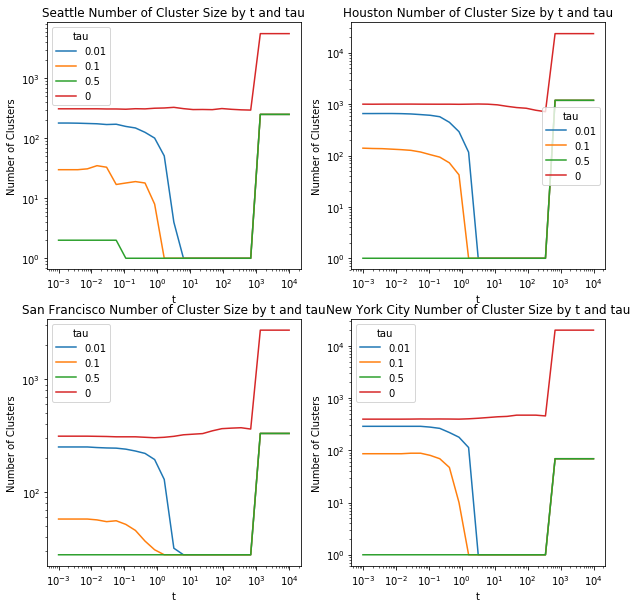

In [52]:
def plot_cardinality_1city(num_clusters, ax, title):
    for tau in taus:
        ax.plot(ts, [value[tau] for t, value in num_clusters.items()], label=tau)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('t')
    ax.set_ylabel('Number of Clusters')
    ax.legend(title='tau')
    ax.set_title(title)

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))
plot_cardinality_1city(seattle_num_clusters, ax1, 'Seattle Number of Cluster Size by t and tau')
plot_cardinality_1city(houston_num_clusters, ax2, 'Houston Number of Cluster Size by t and tau')
plot_cardinality_1city(sf_num_clusters, ax3, 'San Francisco Number of Cluster Size by t and tau')
plot_cardinality_1city(nyc_num_clusters, ax4, 'New York City Number of Cluster Size by t and tau')
plt.show()

In [53]:
seattle_m = Basemap(
        projection='merc',
        llcrnrlon=min(seattle_data['lon']) - .07,
        llcrnrlat=min(seattle_data['lat']) - .01,
        urcrnrlon=max(seattle_data['lon']) + .07,
        urcrnrlat=max(seattle_data['lat']) + .01,
        lat_ts=0,
        resolution='h',
        suppress_ticks=True)

houston_m = Basemap(
        projection='merc',
        llcrnrlon=min(houston_data['lon']),
        llcrnrlat=min(houston_data['lat']),
        urcrnrlon=max(houston_data['lon']),
        urcrnrlat=max(houston_data['lat']),
        lat_ts=0,
        resolution='h',
        suppress_ticks=True)

sf_m = Basemap(
        projection='merc',
        llcrnrlon=-122.54,
        llcrnrlat=37.7,
        urcrnrlon=-122.34,
        urcrnrlat=37.83,
        lat_ts=0,
        resolution='h',
        suppress_ticks=True)

nyc_m = Basemap(
        projection='merc',
        llcrnrlon=-74.1,
        llcrnrlat=40.55,
        urcrnrlon=-73.65,
        urcrnrlat=40.92,
        lat_ts=0,
        resolution='h',
        suppress_ticks=True)

In [ ]:
# Exploring the difference between the two scales

In [54]:
ts

[0.001,
 0.0019573417814876598,
 0.003831186849557289,
 0.007498942093324558,
 0.014677992676220698,
 0.028729848333536655,
 0.05623413251903491,
 0.11006941712522103,
 0.21544346900318845,
 0.4216965034285822,
 0.825404185268019,
 1.6155980984398746,
 3.1622776601683795,
 6.18965818891261,
 12.115276586285901,
 23.71373705661655,
 46.41588833612782,
 90.8517575651688,
 177.82794100389228,
 348.0700588428413,
 681.2920690579622,
 1333.521432163324,
 2610.1572156825387,
 5108.969774506934,
 10000.0]

In [ ]:
houston_positions = {i: houston_m(pair[1], pair[2]) 
                     for i, pair in enumerate(houston_data[['lon', 'lat']].itertuples())}

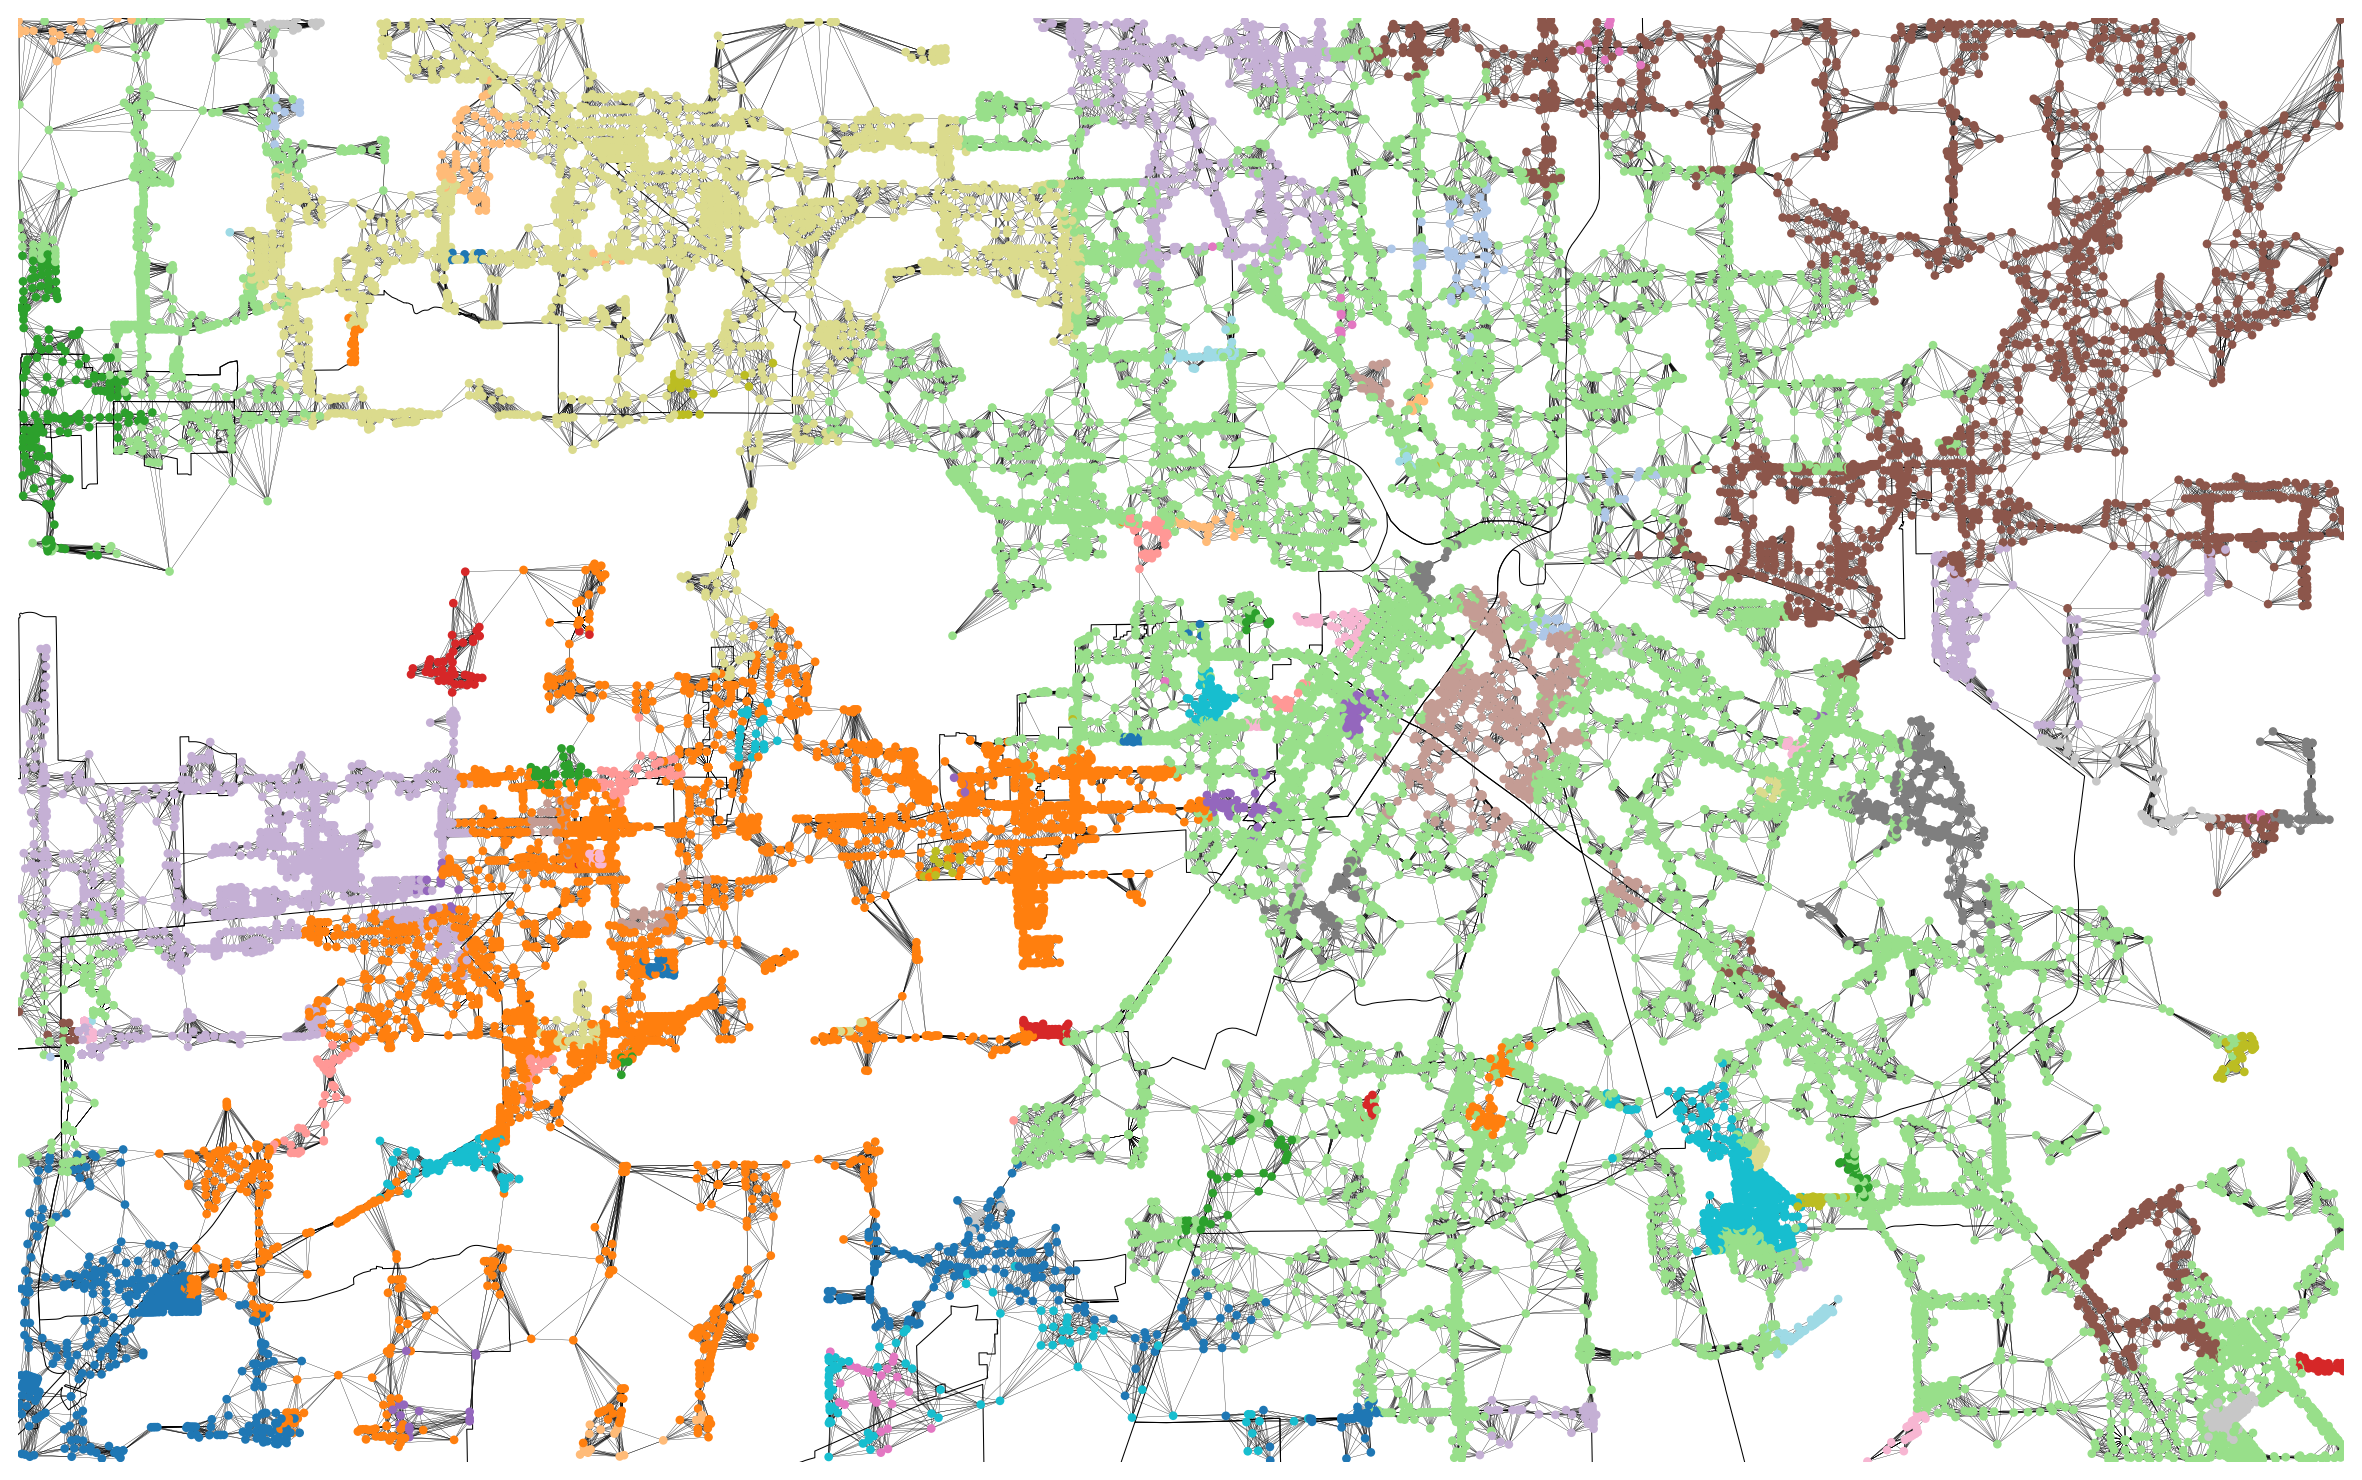

In [61]:
plt.figure(figsize=(20, 20), dpi=150)
houston_m.readshapefile('../houston/shapefiles/Management_Districts', 'Management_Districts')
orig_plot_segments(houston_G, houston_Cs[0.05623413251903491][.1], houston_positions, node_size=10,
              width=.15)
plt.show()

plt.figure(figsize=(20, 20), dpi=150)
houston_m.readshapefile('../houston/shapefiles/Management_Districts', 'Management_Districts')
orig_plot_segments(houston_G, houston_Cs[12.115276586285901][.1], houston_positions, node_size=10,
              width=.15)
plt.show()